In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [44]:
import os
working_directory=os.getcwd()
print(working_directory)

/Users/jchen056/CTPDataScienceGroup/BA


# import files 

In [45]:
df=pd.read_csv('/Users/jchen056/CTPDataScienceGroup/data/BusinessAnalyst.csv')
df.head()


Unnamed: 0 index                                         Job Title  \
0          0     0  Business Analyst - Clinical & Logistics Platform   
1          1     1                                  Business Analyst   
2          2     2                                      Data Analyst   
3          3     3   Information Security Analyst, Incident Response   
4          4     4                     Analyst - FP&A Global Revenue   

               Salary Estimate  \
0  $56K-$102K (Glassdoor est.)   
1  $56K-$102K (Glassdoor est.)   
2  $56K-$102K (Glassdoor est.)   
3  $56K-$102K (Glassdoor est.)   
4  $56K-$102K (Glassdoor est.)   

                                     Job Description Rating  \
0  Company Overview\n\n\nAt Memorial Sloan Ketter...    3.9   
1  We are seeking for an energetic and collaborat...    3.8   
2  For more than a decade, Asembia has been worki...    3.6   
3  Job Description Summary\nThe Information Secur...    3.6   
4  Magnite is the world's largest independent sel...    3.4   

                    Company Name            Location        Headquarters  \
0  Memorial Sloan-Kettering\n3.9        New York, NY        New York, NY   
1   Paine Schwartz Partners\n3.8        New York, NY        New York, NY   
2                   Asembia\n3.6    Florham Park, NJ    Florham Park, NJ   
3                        BD\n3.6  Franklin Lakes, NJ  Franklin Lakes, NJ   
4           Rubicon Project\n3.4        New York, NY     Los Angeles, CA   

                    Size Founded       Type of ownership  \
0       10000+ employees    1884  Nonprofit Organization   
1      1 to 50 employees      -1       Company - Private   
2  501 to 1000 employees    2004       Company - Private   
3       10000+ employees    1897        Company - Public   
4   201 to 500 employees    2007        Company - Public   

                             Industry                     Sector  \
0    Health Care Services & Hospitals                Health Care   
1    Venture Capital & Private Equity                    Finance   
2           Biotech & Pharmaceuticals  Biotech & Pharmaceuticals   
3  Health Care Products Manufacturing              Manufacturing   
4                            Internet     Information Technology   

                      Revenue  \
0      $2 to $5 billion (USD)   
1    Unknown / Non-Applicable   
2     $5 to $10 million (USD)   
3          $10+ billion (USD)   
4  $100 to $500 million (USD)   

                                         Competitors Easy Apply  
0  Mayo Clinic, The Johns Hopkins Hospital, MD An...         -1  
1                                                 -1       True  
2                                                 -1         -1  
3                            Abbott, Siemens, Baxter         -1  
4                 PubMatic, AppNexus, Index Exchange       True

In [46]:
print("shape of the dataframe:",df.shape)
print(df.isnull().sum())
print("the number of duplicates",df.duplicated().sum())

shape of the dataframe: (4092, 17)
Unnamed: 0             0
index                  0
Job Title              0
Salary Estimate        0
Job Description        0
Rating                 0
Company Name           0
Location               0
Headquarters           0
Size                   0
Founded                0
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
Competitors          400
Easy Apply           400
dtype: int64
the number of duplicates 0


# Data Cleaning

In [47]:
salary_est=list(df['Salary Estimate'])

salary_re=[]
for i in salary_est:
    a=re.findall(r"\d+",i)
    salary_re.append(a)

df['salary_cleaned']=salary_re
df.head()

Unnamed: 0 index                                         Job Title  \
0          0     0  Business Analyst - Clinical & Logistics Platform   
1          1     1                                  Business Analyst   
2          2     2                                      Data Analyst   
3          3     3   Information Security Analyst, Incident Response   
4          4     4                     Analyst - FP&A Global Revenue   

               Salary Estimate  \
0  $56K-$102K (Glassdoor est.)   
1  $56K-$102K (Glassdoor est.)   
2  $56K-$102K (Glassdoor est.)   
3  $56K-$102K (Glassdoor est.)   
4  $56K-$102K (Glassdoor est.)   

                                     Job Description Rating  \
0  Company Overview\n\n\nAt Memorial Sloan Ketter...    3.9   
1  We are seeking for an energetic and collaborat...    3.8   
2  For more than a decade, Asembia has been worki...    3.6   
3  Job Description Summary\nThe Information Secur...    3.6   
4  Magnite is the world's largest independent sel...    3.4   

                    Company Name            Location        Headquarters  \
0  Memorial Sloan-Kettering\n3.9        New York, NY        New York, NY   
1   Paine Schwartz Partners\n3.8        New York, NY        New York, NY   
2                   Asembia\n3.6    Florham Park, NJ    Florham Park, NJ   
3                        BD\n3.6  Franklin Lakes, NJ  Franklin Lakes, NJ   
4           Rubicon Project\n3.4        New York, NY     Los Angeles, CA   

                    Size Founded       Type of ownership  \
0       10000+ employees    1884  Nonprofit Organization   
1      1 to 50 employees      -1       Company - Private   
2  501 to 1000 employees    2004       Company - Private   
3       10000+ employees    1897        Company - Public   
4   201 to 500 employees    2007        Company - Public   

                             Industry                     Sector  \
0    Health Care Services & Hospitals                Health Care   
1    Venture Capital & Private Equity                    Finance   
2           Biotech & Pharmaceuticals  Biotech & Pharmaceuticals   
3  Health Care Products Manufacturing              Manufacturing   
4                            Internet     Information Technology   

                      Revenue  \
0      $2 to $5 billion (USD)   
1    Unknown / Non-Applicable   
2     $5 to $10 million (USD)   
3          $10+ billion (USD)   
4  $100 to $500 million (USD)   

                                         Competitors Easy Apply salary_cleaned  
0  Mayo Clinic, The Johns Hopkins Hospital, MD An...         -1      [56, 102]  
1                                                 -1       True      [56, 102]  
2                                                 -1         -1      [56, 102]  
3                            Abbott, Siemens, Baxter         -1      [56, 102]  
4                 PubMatic, AppNexus, Index Exchange       True      [56, 102]

In [48]:
salary_min=[]
salary_max=[]
for i in salary_re:
    if len(i)==2:
        salary_min.append(i[0])
        salary_max.append(i[1])
    if len(i)==1:
        salary_min.append(i[0])
        salary_max.append(i[0])
df['min salary']=salary_min
df['max salary']=salary_max
df.head()

Unnamed: 0 index                                         Job Title  \
0          0     0  Business Analyst - Clinical & Logistics Platform   
1          1     1                                  Business Analyst   
2          2     2                                      Data Analyst   
3          3     3   Information Security Analyst, Incident Response   
4          4     4                     Analyst - FP&A Global Revenue   

               Salary Estimate  \
0  $56K-$102K (Glassdoor est.)   
1  $56K-$102K (Glassdoor est.)   
2  $56K-$102K (Glassdoor est.)   
3  $56K-$102K (Glassdoor est.)   
4  $56K-$102K (Glassdoor est.)   

                                     Job Description Rating  \
0  Company Overview\n\n\nAt Memorial Sloan Ketter...    3.9   
1  We are seeking for an energetic and collaborat...    3.8   
2  For more than a decade, Asembia has been worki...    3.6   
3  Job Description Summary\nThe Information Secur...    3.6   
4  Magnite is the world's largest independent sel...    3.4   

                    Company Name            Location        Headquarters  \
0  Memorial Sloan-Kettering\n3.9        New York, NY        New York, NY   
1   Paine Schwartz Partners\n3.8        New York, NY        New York, NY   
2                   Asembia\n3.6    Florham Park, NJ    Florham Park, NJ   
3                        BD\n3.6  Franklin Lakes, NJ  Franklin Lakes, NJ   
4           Rubicon Project\n3.4        New York, NY     Los Angeles, CA   

                    Size Founded       Type of ownership  \
0       10000+ employees    1884  Nonprofit Organization   
1      1 to 50 employees      -1       Company - Private   
2  501 to 1000 employees    2004       Company - Private   
3       10000+ employees    1897        Company - Public   
4   201 to 500 employees    2007        Company - Public   

                             Industry                     Sector  \
0    Health Care Services & Hospitals                Health Care   
1    Venture Capital & Private Equity                    Finance   
2           Biotech & Pharmaceuticals  Biotech & Pharmaceuticals   
3  Health Care Products Manufacturing              Manufacturing   
4                            Internet     Information Technology   

                      Revenue  \
0      $2 to $5 billion (USD)   
1    Unknown / Non-Applicable   
2     $5 to $10 million (USD)   
3          $10+ billion (USD)   
4  $100 to $500 million (USD)   

                                         Competitors Easy Apply  \
0  Mayo Clinic, The Johns Hopkins Hospital, MD An...         -1   
1                                                 -1       True   
2                                                 -1         -1   
3                            Abbott, Siemens, Baxter         -1   
4                 PubMatic, AppNexus, Index Exchange       True   

  salary_cleaned min salary max salary  
0      [56, 102]         56        102  
1      [56, 102]         56        102  
2      [56, 102]         56        102  
3      [56, 102]         56        102  
4      [56, 102]         56        102

<AxesSubplot:ylabel='states'>

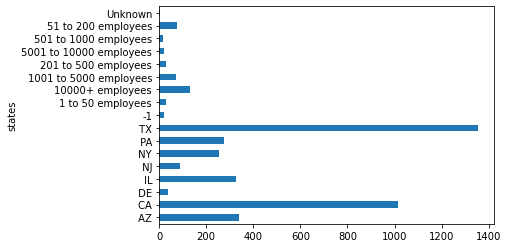

In [57]:
states=[]
for i in list(df['Location']):
    states.append(i.split(',')[-1])
df['states']=states


df.groupby('states')['states'].count().plot(kind="barh")

In [56]:
df.head()

Unnamed: 0 index                                         Job Title  \
0          0     0  Business Analyst - Clinical & Logistics Platform   
1          1     1                                  Business Analyst   
2          2     2                                      Data Analyst   
3          3     3   Information Security Analyst, Incident Response   
4          4     4                     Analyst - FP&A Global Revenue   

               Salary Estimate  \
0  $56K-$102K (Glassdoor est.)   
1  $56K-$102K (Glassdoor est.)   
2  $56K-$102K (Glassdoor est.)   
3  $56K-$102K (Glassdoor est.)   
4  $56K-$102K (Glassdoor est.)   

                                     Job Description Rating  \
0  Company Overview\n\n\nAt Memorial Sloan Ketter...    3.9   
1  We are seeking for an energetic and collaborat...    3.8   
2  For more than a decade, Asembia has been worki...    3.6   
3  Job Description Summary\nThe Information Secur...    3.6   
4  Magnite is the world's largest independent sel...    3.4   

                    Company Name            Location        Headquarters  \
0  Memorial Sloan-Kettering\n3.9        New York, NY        New York, NY   
1   Paine Schwartz Partners\n3.8        New York, NY        New York, NY   
2                   Asembia\n3.6    Florham Park, NJ    Florham Park, NJ   
3                        BD\n3.6  Franklin Lakes, NJ  Franklin Lakes, NJ   
4           Rubicon Project\n3.4        New York, NY     Los Angeles, CA   

                    Size  ...       Type of ownership  \
0       10000+ employees  ...  Nonprofit Organization   
1      1 to 50 employees  ...       Company - Private   
2  501 to 1000 employees  ...       Company - Private   
3       10000+ employees  ...        Company - Public   
4   201 to 500 employees  ...        Company - Public   

                             Industry                     Sector  \
0    Health Care Services & Hospitals                Health Care   
1    Venture Capital & Private Equity                    Finance   
2           Biotech & Pharmaceuticals  Biotech & Pharmaceuticals   
3  Health Care Products Manufacturing              Manufacturing   
4                            Internet     Information Technology   

                      Revenue  \
0      $2 to $5 billion (USD)   
1    Unknown / Non-Applicable   
2     $5 to $10 million (USD)   
3          $10+ billion (USD)   
4  $100 to $500 million (USD)   

                                         Competitors Easy Apply  \
0  Mayo Clinic, The Johns Hopkins Hospital, MD An...         -1   
1                                                 -1       True   
2                                                 -1         -1   
3                            Abbott, Siemens, Baxter         -1   
4                 PubMatic, AppNexus, Index Exchange       True   

  salary_cleaned min salary max salary states  
0      [56, 102]         56        102     NY  
1      [56, 102]         56        102     NY  
2      [56, 102]         56        102     NJ  
3      [56, 102]         56        102     NJ  
4      [56, 102]         56        102     NY  

[5 rows x 21 columns]

In [59]:
set(states)

{' AZ',
 ' CA',
 ' DE',
 ' IL',
 ' NJ',
 ' NY',
 ' PA',
 ' TX',
 '-1',
 '1 to 50 employees',
 '10000+ employees',
 '1001 to 5000 employees',
 '201 to 500 employees',
 '5001 to 10000 employees',
 '501 to 1000 employees',
 '51 to 200 employees',
 'Unknown'}